In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import silhouette_score 

from sklearn.cluster import KMeans, DBSCAN

In [3]:
uber_raw_data = pd.concat([pd.read_csv('src/uber-raw-data-{}14.csv'.format(m)) for m in ['apr', 'may', 'jun', 'jul', 'aug', 'sep']], axis=0)
uber_raw_data .head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
#convert Date/Time column into datetime
uber_raw_data['Date/Time'] = pd.to_datetime(uber_raw_data['Date/Time'])

In [5]:
#Extract Year, Month, Day and Hour
uber_raw_data['Year'] = uber_raw_data['Date/Time'].apply(lambda x: x.year)
uber_raw_data['Month'] = uber_raw_data['Date/Time'].apply(lambda x: x.month)
uber_raw_data['Month_Of_Year'] =  uber_raw_data['Date/Time'].dt.month_name()
uber_raw_data['Day'] = uber_raw_data['Date/Time'].apply(lambda x: x.day)
uber_raw_data['Day_Of_Week'] = uber_raw_data['Date/Time'].dt.day_name()
uber_raw_data['Hour'] = uber_raw_data['Date/Time'].apply(lambda x: x.hour)

uber_raw_data .head()

,Date/Time,Lat,Lon,Base,Year,Month,Month_Of_Year,Day,Day_Of_Week,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,4,April,1,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,4,April,1,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,4,April,1,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,4,April,1,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,4,April,1,Tuesday,0


/var/folders/p9/pt_mdfj90sdbz_6v4znp442w0000gn/T/ipykernel_34302/2439644793.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


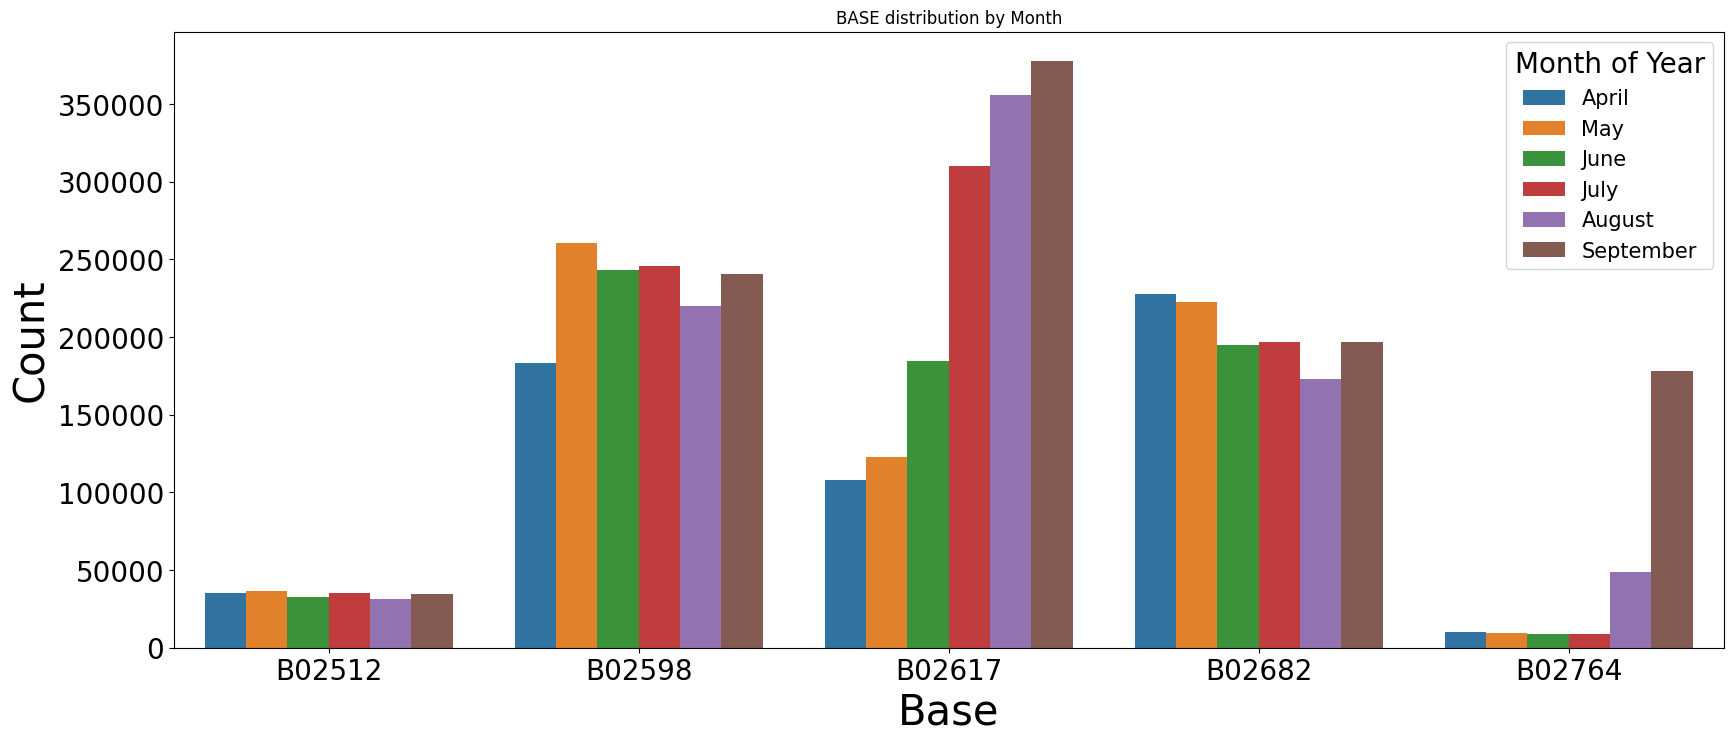

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(uber_raw_data, x='Base', hue='Month_Of_Year', ax=ax).set(title='BASE distribution by Month')
ax.legend(title='Month of Year', 
          title_fontsize = 20,
          fontsize=15)
ax.set_xlabel('Base', fontsize=30)
ax.set_ylabel('Count', fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
fig.show();

/var/folders/p9/pt_mdfj90sdbz_6v4znp442w0000gn/T/ipykernel_34302/730714940.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


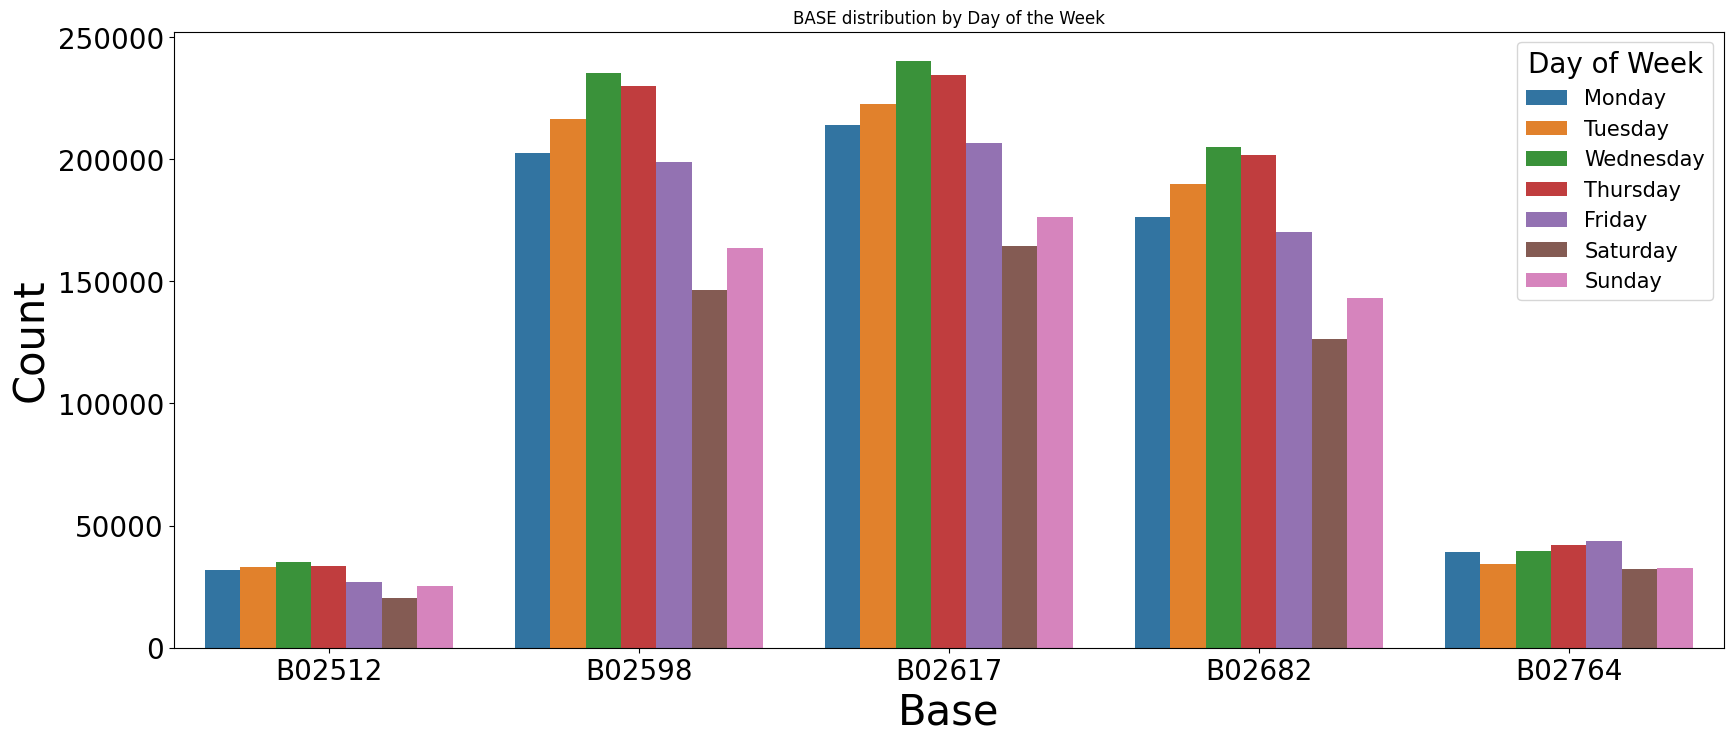

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(uber_raw_data, x='Base', hue='Day_Of_Week', ax=ax).set(title='BASE distribution by Day of the Week')
ax.legend(title='Day of Week', 
          title_fontsize = 20,
          fontsize=15, 
          labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_xlabel('Base', fontsize=30)
ax.set_ylabel('Count', fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
fig.show();

### The ride count varies significantly across different bases, but they all exhibit a similar pattern over time.<br>
### Mondays and Sundays experience considerably lower activity compared to other days, whereas Wednesday and Thursdays stand out as the busiest days.<br>

/var/folders/p9/pt_mdfj90sdbz_6v4znp442w0000gn/T/ipykernel_34302/1401522145.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


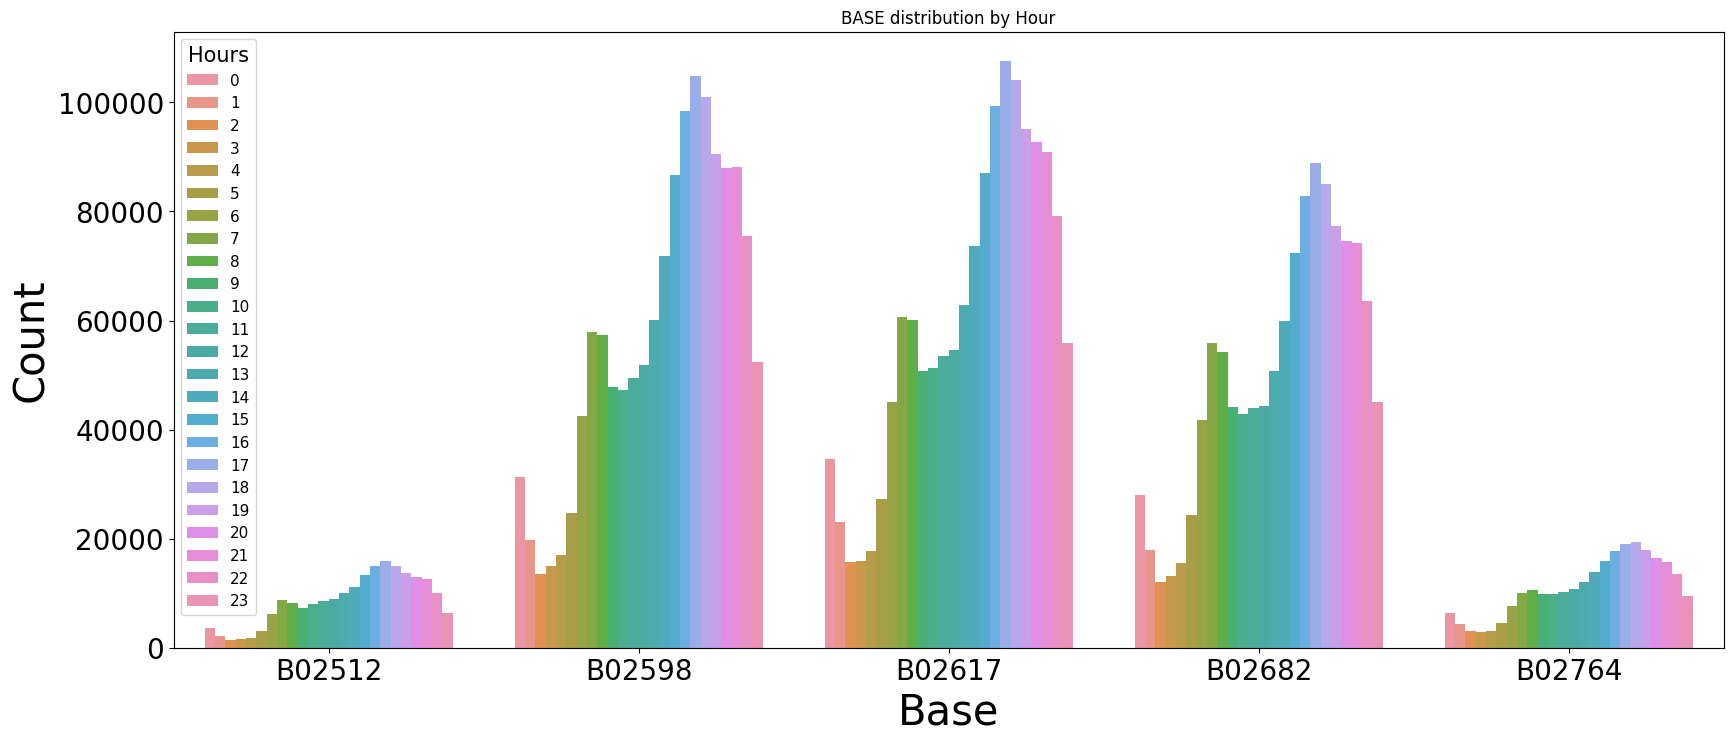

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(uber_raw_data, x='Base', hue='Hour', ax=ax).set(title='BASE distribution by Hour')
ax.legend(title='Hours', 
          title_fontsize = 15,
          fontsize=11)
ax.set_xlabel('Base', fontsize=30)
ax.set_ylabel('Count', fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
fig.show();

### The peak hours for rides occur between 4 PM and 9 PM, while the early morning hours, specifically between 1 AM and 5 AM, witness the lowest ride activity.

In [263]:
#scatter mapbox of uber raw data for Day=1 at Hour=19 for All Base
mask1 = (uber_raw_data['Day']==1) & (uber_raw_data['Hour']== 19)
uber_filter_data = uber_raw_data.loc[mask1, :]
print('Number of rows :', uber_filter_data.shape[0])

fig = px.scatter_mapbox(uber_filter_data, lat='Lat', lon='Lon', color='Base', mapbox_style='carto-positron')
 
fig.show()

In [13]:
uber_filter_data.head()

,Date/Time,Lat,Lon,Base,Year,Month,Month_Of_Year,Day,Day_Of_Week,Hour
784,2014-04-01 19:00:00,40.7558,-73.9751,B02512,2014,4,April,1,Tuesday,19
785,2014-04-01 19:01:00,40.7899,-73.9697,B02512,2014,4,April,1,Tuesday,19
786,2014-04-01 19:02:00,40.7219,-74.0074,B02512,2014,4,April,1,Tuesday,19
787,2014-04-01 19:02:00,40.7430,-74.0076,B02512,2014,4,April,1,Tuesday,19
788,2014-04-01 19:04:00,40.7688,-73.8625,B02512,2014,4,April,1,Tuesday,19


## Clustering

### K-MEANS

In [15]:
sample_data = uber_filter_data.drop(['Date/Time', 'Year', 'Month', 'Month_Of_Year', 'Day_Of_Week'], axis=1)
sample_data.head()

#Standard scaler preprocessing
scaler = StandardScaler()

X = scaler.fit_transform(sample_data[['Lat', 'Lon']])
print(X[:5])


[[ 0.42854722 -0.10649091]
 [ 1.25589075 -0.02086214]
 [-0.39394385 -0.6186778 ]
 [ 0.11799012 -0.62184923]
 [ 0.74395678  1.67902748]]


#### Determination of clusters number

In [16]:
#Determination of n_clusters
wss = []
k = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state = 0)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
    k.append(i)



/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

In [17]:
# Create DataFrame
wcss_frame = pd.DataFrame(wss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show() 

In [18]:
# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=2 is 0.7092440161264325


/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=3 is 0.40788885596884467


/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=4 is 0.4689976086977309


/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=5 is 0.486582373909291


/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=6 is 0.490696598137758


/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=7 is 0.4816109871467187


/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=8 is 0.48184914666800627


/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=9 is 0.4770318420545472


/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=10 is 0.48199152524502653


In [19]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show() # if using workspace

### We can take n_cluster=6

In [20]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)

/Users/christiansegnou/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6, random_state=0)

In [25]:
# Visualisation bi-dimensionnelle
sample_data.loc[:,'Cluster_KMeans'] = kmeans.predict(X)
fig = px.scatter_mapbox(sample_data, lat='Lat', lon='Lon', color='Cluster_KMeans', mapbox_style='carto-positron', title='K-MEANS clusters in NYC')
 
fig.show()

### We can observe that most of the clusters found by K-means clustering originate from Metropolitan Avenue, with the exception of clusters 2 and 4, which are more decentralized.

### DBSCAN

In [22]:
dbscan = DBSCAN(eps=0.2, metric='manhattan', min_samples=20)
dbscan.fit(X)
np.unique(dbscan.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([ 506, 6797,  402,   79,  314,   29,   19]))

In [23]:
dbscan.labels_

array([0, 0, 0, ..., 0, 3, 0])

In [26]:
dbscan = DBSCAN(eps=0.15, metric='manhattan', min_samples=20)
dbscan.fit(X)
print(np.unique(dbscan.labels_,return_counts=True))

# Visualisation bi-dimensionnelle
sample_data.loc[:,'DBSCAN'] = dbscan.labels_
fig = px.scatter_mapbox(sample_data.loc[sample_data['DBSCAN']!=-1, :], lat='Lat', lon='Lon', color='DBSCAN', mapbox_style='carto-positron', title='DBSCAN clusters in NYC')
 
fig.show()

(array([-1,  0,  1,  2,  3,  4,  5]), array([ 676, 5958,  400,  365,   79,  354,  314]))


### With DBSCAN Clustering we get more concentric cluster

### DBSCAN IN PRODUCTION

In [27]:
def uber_hot_zone(data, eps, min_samples, day, hour):

    mask = (data['Day']==day) & (data['Hour']== hour)
    filter_data = data.loc[mask, :]

    scaler = StandardScaler()

    X = scaler.fit_transform(filter_data[['Lat', 'Lon']])

    dbscan = DBSCAN(eps=eps, metric='manhattan', min_samples=min_samples)
    dbscan.fit(X)

    # Visualisation bi-dimensionnelle
    filter_data.loc[:,'DBSCAN'] = dbscan.labels_
    fig = px.scatter_mapbox(filter_data.loc[filter_data['DBSCAN']!=-1, :], lat='Lat', lon='Lon', color='DBSCAN', mapbox_style='carto-positron')
 
    fig.show()
    

In [28]:
sample_data = uber_raw_data.drop(['Date/Time', 'Year', 'Month', 'Month_Of_Year', 'Day_Of_Week'], axis=1)
sample_data.head()

,Lat,Lon,Base,Day,Hour
0,40.7690,-73.9549,B02512,1,0
1,40.7267,-74.0345,B02512,1,0
2,40.7316,-73.9873,B02512,1,0
3,40.7588,-73.9776,B02512,1,0
4,40.7594,-73.9722,B02512,1,0


In [29]:
#Hot zone for day=20 and hour=7
uber_hot_zone(sample_data, eps=0.15, min_samples=20, day=1, hour=7)

/var/folders/p9/pt_mdfj90sdbz_6v4znp442w0000gn/T/ipykernel_34302/2293778712.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
#Hot zone for day=6 and hour=0
uber_hot_zone(sample_data, eps=0.15, min_samples=20, day=6, hour=0)

/var/folders/p9/pt_mdfj90sdbz_6v4znp442w0000gn/T/ipykernel_34302/2293778712.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

